In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import os
import re
import numpy as np
from collections import defaultdict

models_names = ['GoogLeNetda', 'MobileNetV2da', 'SENet18da']
colors = ['r', 'b', 'g', 'm', 'y', 'k']

In [4]:
listfile = defaultdict(lambda :defaultdict(list))
for filename in os.listdir('Results/'):
    
    if filename.startswith("Data_da_GoogLeNet"):# and 'nomomentum' in filename:# or 'sqrtmomentum' in filename):# and 'K3' in filename:
        fnsplit = filename.split('_') 
        mname = fnsplit[2]
           
        if re.match('.*(m5p0|m4p3).*SGD.*exp-..txt', filename):
            if 'wd-' in filename:
                details = '_'.join(fnsplit[4:6])
            else:
                details = '_'.join(fnsplit[4:5])
            listfile[mname][details].append('Results/'+filename)
        #elif not ('nomomentum' in filename) and 'K3' in filename:
        
        else:
            continue
            details = '_'.join(fnsplit[2:5])
            listfile[mname][details].append('Results/'+filename)

In [12]:
listfile['GoogLeNet']['mLR-m4p3_wd-1.0e-04']

['Results/Data_da_GoogLeNet_lr-0.0e+00_mLR-m4p3_wd-1.0e-04_sw-10_SGD_K1_es_exp-3.txt',
 'Results/Data_da_GoogLeNet_lr-0.0e+00_mLR-m4p3_wd-1.0e-04_sw-10_SGD_K1_es_exp-1.txt',
 'Results/Data_da_GoogLeNet_lr-0.0e+00_mLR-m4p3_wd-1.0e-04_sw-10_SGD_K1_es_exp-0.txt',
 'Results/Data_da_GoogLeNet_lr-0.0e+00_mLR-m4p3_wd-1.0e-04_sw-10_SGD_K1_es_exp-2.txt']

In [6]:
mymodel = 'GoogLeNet'
bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]


In [14]:
dictmetrics['mLR-m4p3_wd-1.0e-04']

[defaultdict(list,
             {'atest': [0.3499,
               0.2697,
               0.3949,
               0.5118,
               0.3842,
               0.4049,
               0.567,
               0.6195,
               0.5346,
               0.5865,
               0.5986,
               0.4809,
               0.5772,
               0.6024,
               0.4612,
               0.718,
               0.623,
               0.3908,
               0.2658,
               0.707],
              'atrain': [0.36432,
               0.55842,
               0.63808,
               0.69134,
               0.7236,
               0.74794,
               0.7654,
               0.779,
               0.7886,
               0.80192,
               0.80544,
               0.81014,
               0.8245,
               0.82496,
               0.83188,
               0.84208,
               0.83904,
               0.8506,
               0.84638,
               0.8512],
              'ltest': [1.7381,


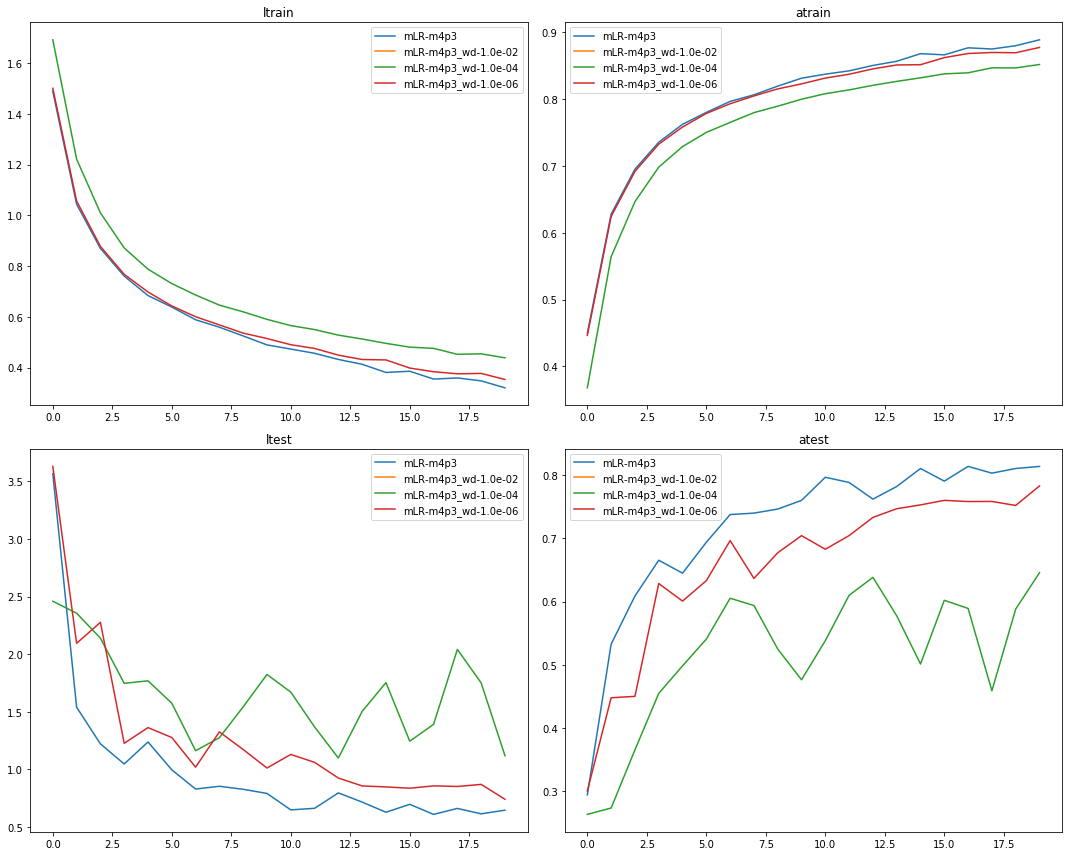

In [16]:
minidx, maxidx = 0, 50

fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    ax.set_title(title)
    lrcolordict = dict((lr, 'C'+str(i)) for (i,lr) in enumerate(['0.0010', '0.0050', '0.0500', '0.0100', '0.1000', '0.0250']))
    lrcolordict['mLR'] = 'k'
    for m in sorted(dictmetrics.keys(), key=lambda k: k.split('_')[::-1]):
        metlist = [[] for _ in range(max(len(exp[title]) for exp in dictmetrics[m]))]
        for exp in dictmetrics[m]:
            for i, x in enumerate(exp[title]):
                metlist[i].append(x)
        metlist = [sorted(ep) for ep in metlist]
        mean = [sum(ep) / len(ep) for ep in metlist]
        mini = [ep[0] for ep in metlist]
        maxi = [ep[-1] for ep in metlist]
        
        if 'mLR' in m:
            mlr = m.split('-')[1]
            minlr, maxlr = int(mlr[1]), int(mlr[3])
            minlr *= (1 if mlr[0] == 'p' else -1)
            maxlr *= (1 if mlr[2] == 'p' else -1)
            
            if minlr == -5 or maxlr == 0:
                continue
            
            #linestyle = '--'
            ax.plot(mean[minidx:maxidx], label=m)
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
        else:
            if 'K1' in m:
                linestyle = '--'
                alpha = 0.8
            else:
                linestyle = ':'
                alpha = 0.8
            lr = float(m[3:])
            if lr < 5e-4:
                pass#continue
            #lr = lr.split('-')[1]
            #ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr], alpha=alpha)
            ax.plot(mean[minidx:maxidx], label=m, alpha=0.8)
            #ax.fill_between(list(range(len(mean[minidx:maxidx]))), mini[minidx:maxidx], y2=maxi[minidx:maxidx])
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
            
#         elif 'nomomentum' in m:
#             lr, K, _ = m.split('_')
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
#             lr = lr.split('-')[1]
#             ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr])
#             ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
#         else:
#             lr, K = m.split('_')
#             lr = lr.split('-')[1]
            
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
        
        
    ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
%debug

In [ ]:
fig, axes = plt.subplots(len(dictmetrics) // 2, 2, figsize=(15.,12.))
from itertools import chain

for m, ax in zip(dictmetrics.keys(), axes.flat):
    for title, c in zip(["ltrain", "ltest"], ['r', 'b']):
        ax.set_title(m)
        metlist = [[] for _ in range(max(len(exp[title]) for exp in dictmetrics[m]))]
        for exp in dictmetrics[m]:
            for i, x in enumerate(exp[title]):
                metlist[i].append(x)
        metlist = [sorted(ep) for ep in metlist]
        mean = [sum(ep) / len(ep) for ep in metlist]
        mini = [ep[0] for ep in metlist]
        maxi = [ep[-1] for ep in metlist]
        
        ax.plot(mean, c, label=title)
        ax.fill_between(list(range(len(mean))), mini, y2=maxi, color=c, linestyle='-', alpha=0.1)
        ax.legend()
plt.tight_layout()
plt.show()


In [2]:
listfile = defaultdict(lambda :defaultdict(list))
for filename in os.listdir('Results/'):
    
    if filename.startswith("Data_") and 'sqrtmomentum' in filename:
        fnsplit = filename.split('_')
        mname = fnsplit[1]
            
        if 'mLR' in filename:
            details = '_'.join(fnsplit[2:7])
            listfile[mname][details].append('Results/'+filename)
        else:
            details = '_'.join(fnsplit[2:5])
            listfile[mname][details].append('Results/'+filename)

In [3]:
listfile.keys()

dict_keys(['MobileNetV2da', 'SENet18da', 'GoogLeNetda'])

In [4]:
mymodel = 'GoogLeNetda'
bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]


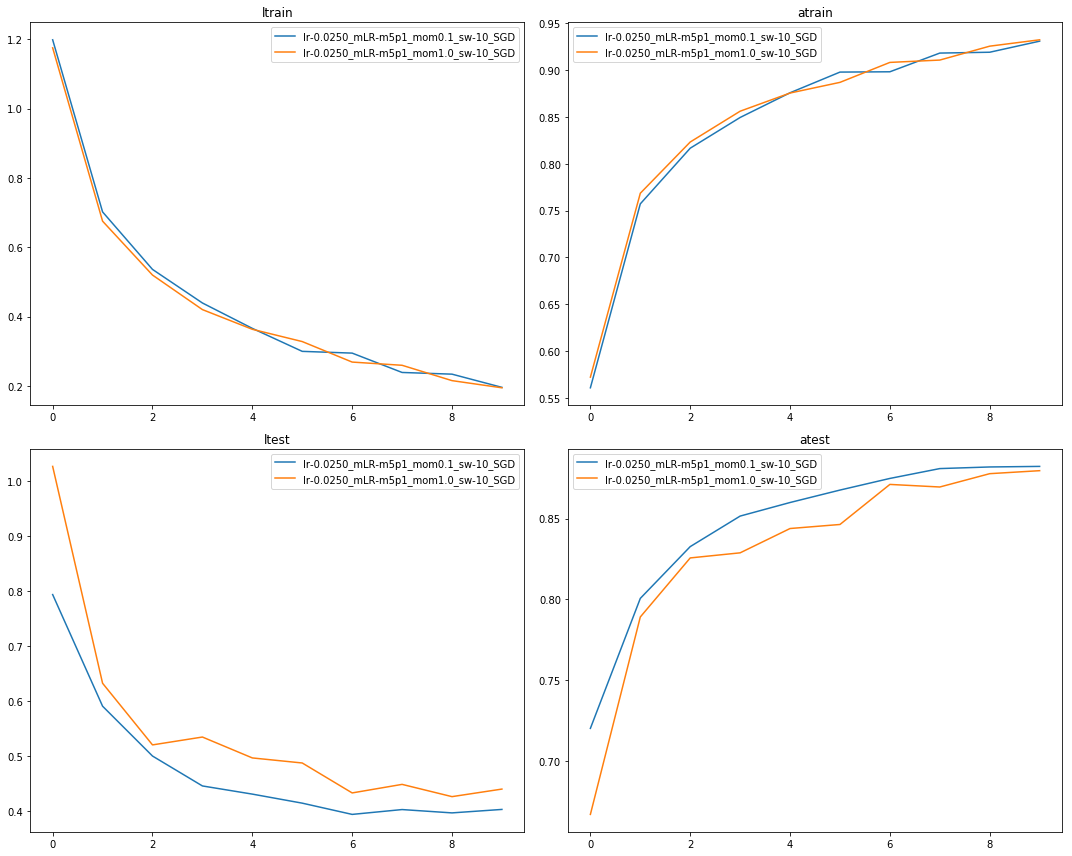

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    ax.set_title(title)
    lrcolordict = dict((lr, 'C'+str(i)) for (i,lr) in enumerate(['0.0010', '0.0050', '0.0500', '0.0100', '0.1000', '0.0250']))
    lrcolordict['mLR'] = 'k'
    for m in sorted(dictmetrics.keys(), key=lambda k: k.split('_')[::-1]):
        metlist = [[] for _ in range(max(len(exp[title]) for exp in dictmetrics[m]))]
        for exp in dictmetrics[m]:
            for i, x in enumerate(exp[title]):
                metlist[i].append(x)
        metlist = [sorted(ep) for ep in metlist]
        mean = [sum(ep) / len(ep) for ep in metlist]
        mini = [ep[0] for ep in metlist]
        maxi = [ep[-1] for ep in metlist]
        
        if 'mLR' in m:
            linestyle = '-'
            lr = 'mLR'
            ax.plot(mean, label=m, linestyle=linestyle)
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
        else:
            if 'K1' in m:
                linestyle = '--'
                alpha = 0.8
            else:
                linestyle = ':'
                alpha = 0.5
            lr, K, _ = m.split('_')
            lr = lr.split('-')[1]
            ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr], alpha=0.3)
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
            
#         elif 'nomomentum' in m:
#             lr, K, _ = m.split('_')
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
#             lr = lr.split('-')[1]
#             ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr])
#             ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
#         else:
#             lr, K = m.split('_')
#             lr = lr.split('-')[1]
            
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
        
        
    ax.legend()
plt.tight_layout()
plt.show()


In [7]:
listfile = defaultdict(lambda :defaultdict(list))
mymodel = ['GoogLeNet', 'MobileNetV2', 'SENet18'][0]
mymodel = 'SENet18da'


for filename in os.listdir('Results/'):
    if re.match('Data_{}.*SGD.*K1.*nomomentum.*'.format(mymodel), filename):
    
        #if re.match('Data_da.*SGD.*K1.*es.*nomomentum.txt'.format(mymodel), filename):
        fnsplit = filename.split('_')       
        print(fnsplit)
        if 'mLR' in filename:
            #_, _, _, _, minmax, _, _, _, _, _, _ = fnsplit
            #_, _, modelname, _, minmax, _, _, _, _, _ = fnsplit
            #details = minmax
            details = fnsplit[3]
        else:
            #_, _, _, lr,_, _, _, _, _ = fnsplit
            #_, _, modelname, lr,_, _, _, _ = fnsplit
            #details = lr
            details = fnsplit[2]
        print(details)
        listfile[mymodel][details].append('Results/'+filename)




bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]

['Data', 'SENet18da', 'lr-0.0250', 'mLR-m1p0', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m1p0
['Data', 'SENet18da', 'lr-0.0250', 'mLR-m7m1', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m7m1
['Data', 'SENet18da', 'lr-0.0250', 'mLR-m1m1', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m1m1
['Data', 'SENet18da', 'lr-0.0250', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
lr-0.0250
['Data', 'SENet18da', 'lr-0.0250', 'mLR-m6p1', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m6p1
['Data', 'SENet18da', 'lr-0.0250', 'mLR-m2m2', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m2m2
['Data', 'SENet18da', 'lr-0.0250', 'mLR-m5m4', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m5m4
['Data', 'SENet18da', 'lr-0.0250', 'mLR-p2p2', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-p2p2
['Data', 'SENet18da', 'lr-0.0250', 'mLR-m4p2', 'sw-10', 'SGD', 'K1', 'e10', 'exp-0', 'nomomentum.txt']
mLR-m4p2
['Data', 'SE

In [8]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


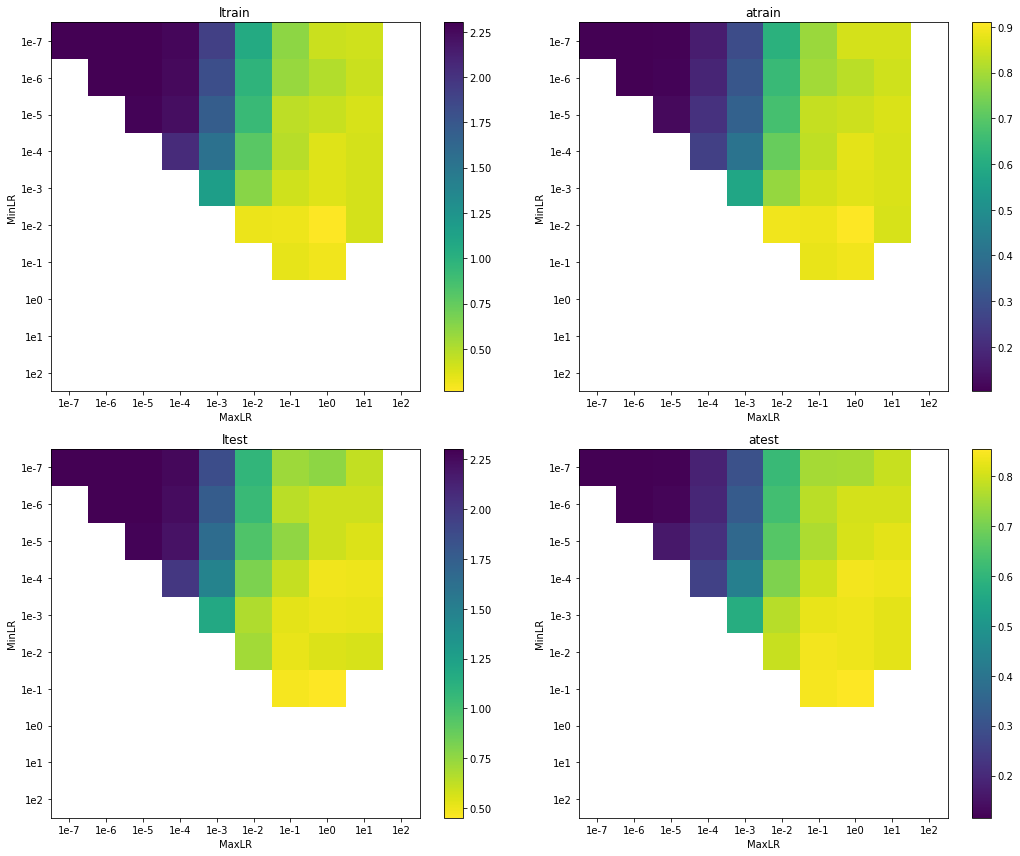

In [9]:
figep = 1000


fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    allmet = []
    op = min if title[0] == 'l' else max
    minmax = op(sum(op(exp[title]) for exp in metlist if exp[title]) / len(metlist) \
                for metlist in dictmetrics.values())
    cmap = 'viridis'
    if title[0] == 'l':
        cmap += '_r'
        vmin, vmax = minmax, 1.
    else:
        vmin, vmax = .7, minmax
    vmin, vmax = None, None
    
    ax.set_title(title)
    met2d = np.zeros((10,10))
    met2d[:,:] = None
    for m in dictmetrics.keys():
        if 'mLR' in m:
            mlr = m.split('-')[1]
            minlr, maxlr = int(mlr[1]), int(mlr[3])
            minlr *= (1 if mlr[0] == 'p' else -1)
            maxlr *= (1 if mlr[2] == 'p' else -1)
            if minlr == maxlr:
                pass
                #continue
        else:
            continue
            minlr = maxlr = int(np.log10(float(m[3:])))        
        metlist = [exp[title][min(len(exp[title])-1, figep)] for exp in dictmetrics[m] if exp[title]]
        met2d[minlr+7,maxlr+7] = sum(metlist) / len(metlist) if metlist else None
        
    
    im = ax.imshow(np.clip(met2d,0., 3.), cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    ax.set_xticklabels(['1e{}'.format(x-7) for x in range(10)])
    ax.set_yticklabels(['1e{}'.format(x-7) for x in range(10)])
    ax.set_xlabel('MaxLR')
    ax.set_ylabel('MinLR')

    fig.colorbar(im, ax=ax)
    
    ax.legend()
    
plt.tight_layout()
plt.show()

In [30]:
%debug

> <ipython-input-29-5cff487317ac>(32)<module>()
     30         else:
     31             #continue
---> 32             minlr = maxlr = int(np.log10(float(m[3:])))
     33         metlist = [exp[title][min(len(exp[title])-1, figep)] for exp in dictmetrics[m] if exp[title]]
     34         met2d[minlr+7,maxlr+7] = sum(metlist) / len(metlist) if metlist else None

ipdb> (m)
'lr-0.0000'
ipdb> q


In [ ]:
listfile = defaultdict(lambda :defaultdict(list))
mymodel = ['GoogLeNet', 'MobileNetV2', 'SENet18'][0]
for filename in os.listdir('Results/'):
    #if re.match('Data_da*{}*K1*es*nomomentum*'.format(mymodel), filename):
    if re.match('Data_da.*Adam.*K1.*es.*'.format(mymodel), filename):
        #print(filename)
        fnsplit = filename.split('_') 
        if '_randw' in filename:
            _, _, modelname, _, minmax, _, _, _, _, _, randw = fnsplit
            details = minmax+'_'+randw
        elif 'mLR' in filename:
            #_, _, modelname, _, minmax, _, _, _, _, _, _ = fnsplit
            _, _, modelname, _, minmax, _, _, _, _, _ = fnsplit
            details = minmax
        else:
            #_, _, modelname, lr,_, _, _, _, _ = fnsplit
            _, _, modelname, lr,_, _, _, _ = fnsplit
            details = lr
        print(details)
        listfile[modelname][details].append('Results/'+filename)




bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]

In [ ]:
figep = 1


fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    allmet = []
    op = min if title[0] == 'l' else max
    minmax = op(sum(op(exp[title]) for exp in metlist if exp[title]) / len(metlist) \
                for metlist in dictmetrics.values())
    cmap = 'viridis'
    if title[0] == 'l':
        cmap += '_r'
        vmin, vmax = minmax, 1.
    else:
        vmin, vmax = .7, minmax
    vmin, vmax = None, None
    
    ax.set_title(title)
    met2d = np.zeros((10,10))
    met2d[:,:] = None
    for m in dictmetrics.keys():
        if 'mLR' in m:
            mlr = m.split('-')[1]
            minlr, maxlr = int(mlr[1]), int(mlr[3])
            minlr *= (1 if mlr[0] == 'p' else -1)
            maxlr *= (1 if mlr[2] == 'p' else -1)
            if minlr == maxlr:
                #pass
                continue
        else:
            continue
            minlr = maxlr = int(np.log10(float(m[3:])))        
        metlist = [exp[title][min(len(exp[title])-1, figep)] for exp in dictmetrics[m] if exp[title]]
        
        if metlist:
            if np.isnan(met2d[minlr+7,maxlr+7]):
                met2d[minlr+7,maxlr+7] = 0
            
            if 'randw' in m:
                met2d[minlr+7,maxlr+7] += sum(metlist) / len(metlist) 
                #met2d[maxlr+7,minlr+7] = sum(metlist) / len(metlist) 
            else:
                met2d[minlr+7,maxlr+7] -= sum(metlist) / len(metlist)
                #met2d[minlr+7,maxlr+7] = sum(metlist) / len(metlist) 
    
    #for i in range(met2d.shape[0]):
    #    for j in range(met2d.shape[1]):
    #        if not np.isnan(met2d[i,j]):
    #            met2d[i,j] = 1 if met2d[i,j] > 0 else -1
    
    im = ax.imshow(met2d, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    ax.set_xticklabels(['1e{}'.format(x-7) for x in range(10)])
    ax.set_yticklabels(['1e{}'.format(x-7) for x in range(10)])
    ax.set_xlabel('MaxLR')
    ax.set_ylabel('MinLR')

    fig.colorbar(im, ax=ax)
    
    ax.legend()
    
plt.tight_layout()
plt.show()

In [ ]:
met2d